In [913]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency

Importing from cleaned data notebook

In [914]:
data = pd.read_csv('data_clean.csv')

In [915]:
data.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q3_balance,range,max,min
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1095.0,792.0,1669.0,877.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,78.0,327.0,366.0,39.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,145.0,222.0,367.0,145.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1119.0,1341.0,1760.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,982.0,1775.0,2140.0,365.0


In [916]:
data.shape

(18000, 16)

In [917]:
data["offer_accepted"].value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

Removing Outliers

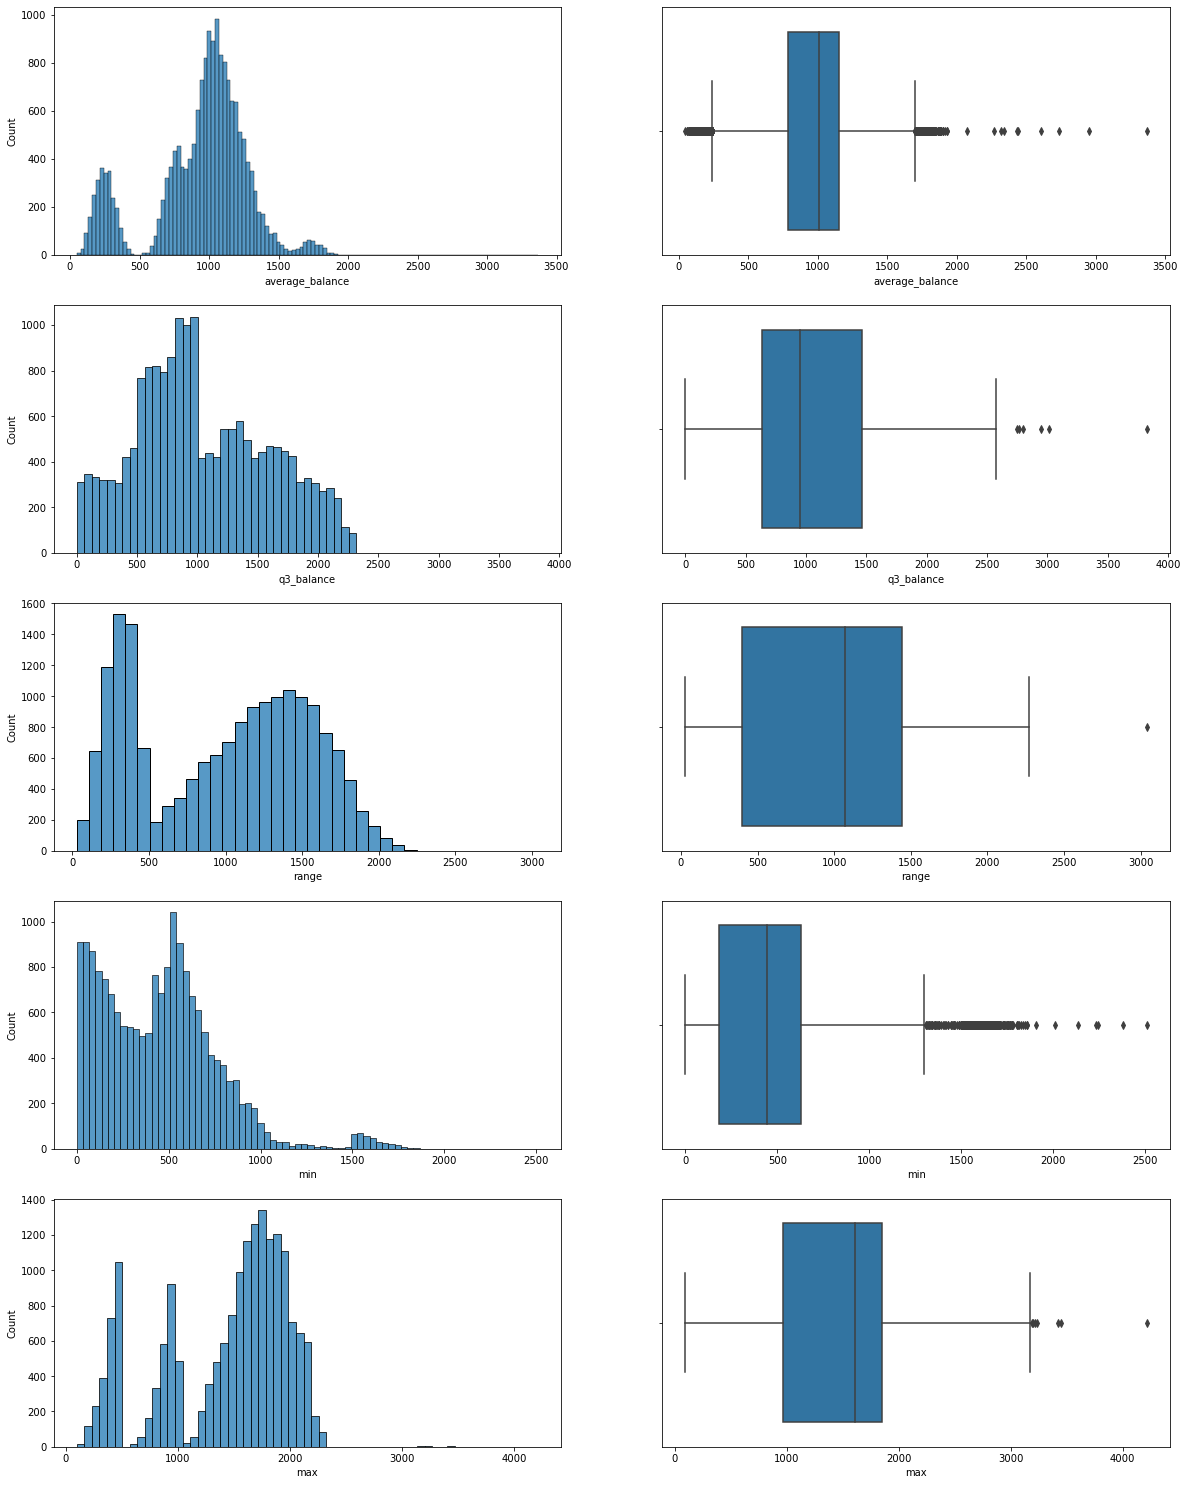

In [918]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5,2,figsize = (20, 20)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 

sns.histplot(data["average_balance"], ax=ax1)
sns.boxplot(data['average_balance'], ax=ax2)
sns.histplot(data['q3_balance'], ax=ax3)
sns.boxplot(data['q3_balance'], ax=ax4)
sns.histplot(data['range'], ax=ax5)
sns.boxplot(data['range'], ax=ax6)
sns.histplot(data['min'], ax=ax7)
sns.boxplot(data['min'], ax=ax8)
sns.histplot(data['max'], ax=ax9)
sns.boxplot(data['max'], ax=ax10)

plt.show()



In [919]:
#remove outliers from average balance
iqr = np.percentile(data['average_balance'],75) - np.percentile(data['average_balance'],25)
upper_limit = np.percentile(data['average_balance'],75) + 2*iqr
lower_limit = np.percentile(data['average_balance'],25) - 2*iqr
data =data[(data['average_balance']>lower_limit) & (data['average_balance']<upper_limit)]

<AxesSubplot:>

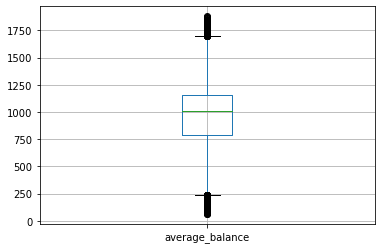

In [920]:
data.boxplot(column=['average_balance'])

In [921]:
#remove outliers from q3 balance
iqr = np.percentile(data['q3_balance'],75) - np.percentile(data['q3_balance'],25)
upper_limit = np.percentile(data['q3_balance'],75) + 1.5*iqr
lower_limit = np.percentile(data['q3_balance'],25) - 1.5*iqr
data =data[(data['q3_balance']>lower_limit) & (data['q3_balance']<upper_limit)]

<AxesSubplot:>

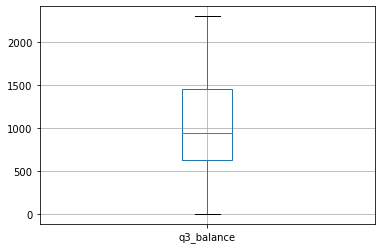

In [922]:
data.boxplot(column=['q3_balance'])

In [923]:
#remove outliers from range

iqr = np.percentile(data['range'],75) - np.percentile(data['range'],25)
upper_limit = np.percentile(data['range'],75) + 1.5*iqr
lower_limit = np.percentile(data['range'],25) - 1.5*iqr
data =data[(data['range']>lower_limit) & (data['range']<upper_limit)]

<AxesSubplot:>

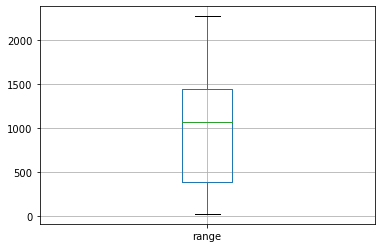

In [924]:
data.boxplot(column=['range'])

In [925]:
#remove outliers from min
iqr = np.percentile(data['min'],75) - np.percentile(data['min'],25)
upper_limit = np.percentile(data['min'],75) + 2*iqr
lower_limit = np.percentile(data['min'],25) - 2*iqr
data =data[(data['min']>lower_limit) & (data['min']<upper_limit)]

<AxesSubplot:>

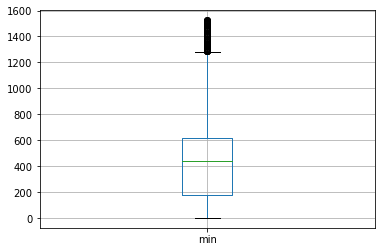

In [926]:
data.boxplot(column=['min'])

In [927]:
#remove outliers from max
iqr = np.percentile(data['max'],75) - np.percentile(data['max'],25)
upper_limit = np.percentile(data['max'],75) + 2*iqr
lower_limit = np.percentile(data['max'],25) - 2*iqr
data =data[(data['max']>lower_limit) & (data['max']<upper_limit)]

<AxesSubplot:>

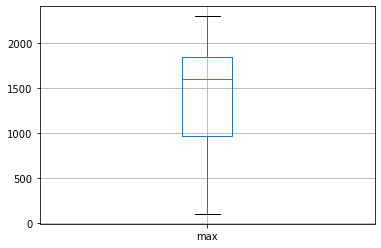

In [928]:
data.boxplot(column=['max'])

In [929]:
data.shape

(17711, 16)

In [930]:
data["offer_accepted"].value_counts()

No     16699
Yes     1012
Name: offer_accepted, dtype: int64

Splitting numericals and categoricals again

In [931]:
cat_columns = []
num_columns = []

for i in data.columns:
    if len(data[i].unique()) > 10:
        num_columns.append(i)
    else:
        cat_columns.append(i)   

num = data[num_columns]
cat = data[cat_columns]

Numericals - applying transformations, tested LOG transformation, BoxCox and Square Root

In [932]:
def log_transform_clean(x):
    if x>0:
        return np.log(x)
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 

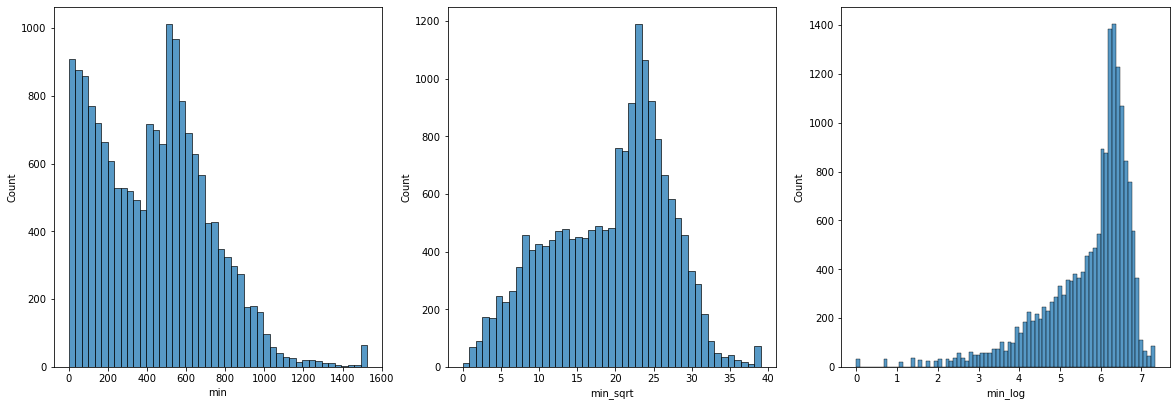

In [933]:
#checking transformations of min

num['min_sqrt'] = num['min']**(1/2)
num["min_log"] = list(map(log_transform_clean, num["min"]))
#min_bc, lmbda = stats.boxcox(data["min"]) -can't do boxcox because some values = 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.histplot(num['min'], ax=ax1)
sns.histplot(num['min_sqrt'], ax=ax2)
sns.histplot(num["min_log"], ax=ax3)
#sns.displot(min_bc, ax=ax4)
plt.show()

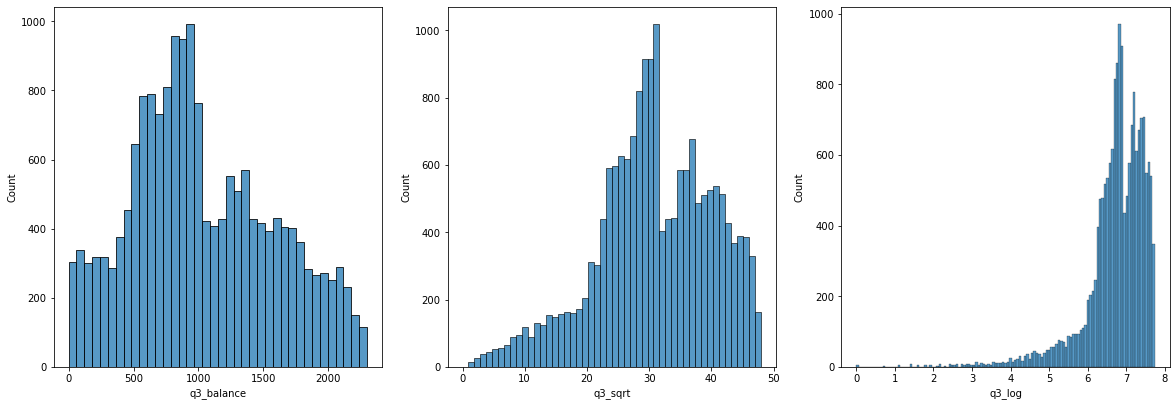

In [934]:
#checking transformations of q3 balance

num['q3_sqrt'] = num['q3_balance']**(1/2)
num["q3_log"] = list(map(log_transform_clean, num["q3_balance"]))
#q3_bc, lmbda = stats.boxcox(data["q3_balance"]) #can't do boxcox because some values < 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.histplot(num['q3_balance'], ax=ax1)
sns.histplot(num['q3_sqrt'], ax=ax2)
sns.histplot(num["q3_log"], ax=ax3)
#sns.displot(q3_bc, ax=ax4)

plt.show()

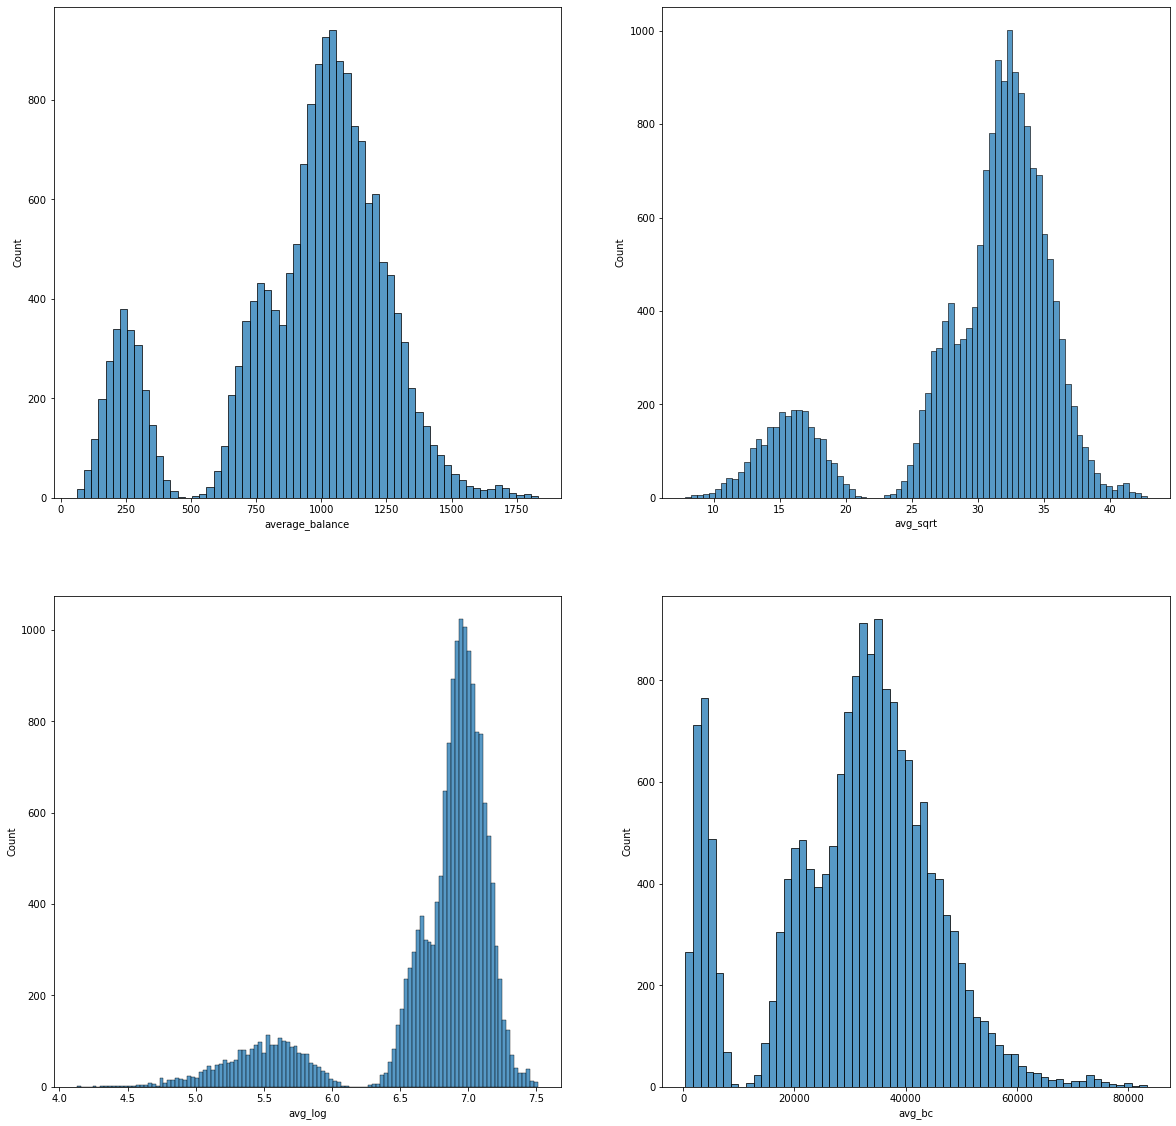

In [935]:
#checking transformations of average balance

num['avg_sqrt'] = num['average_balance']**(1/2)
num["avg_log"] = list(map(log_transform_clean, num["average_balance"]))
avg_bc, lmbda = stats.boxcox(num["average_balance"]) 
num["avg_bc"]= avg_bc
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,15)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.histplot(num['average_balance'], ax=ax1)
sns.histplot(num['avg_sqrt'], ax=ax2)
sns.histplot(num["avg_log"], ax=ax3)
sns.histplot(num["avg_bc"], ax=ax4)

plt.show()

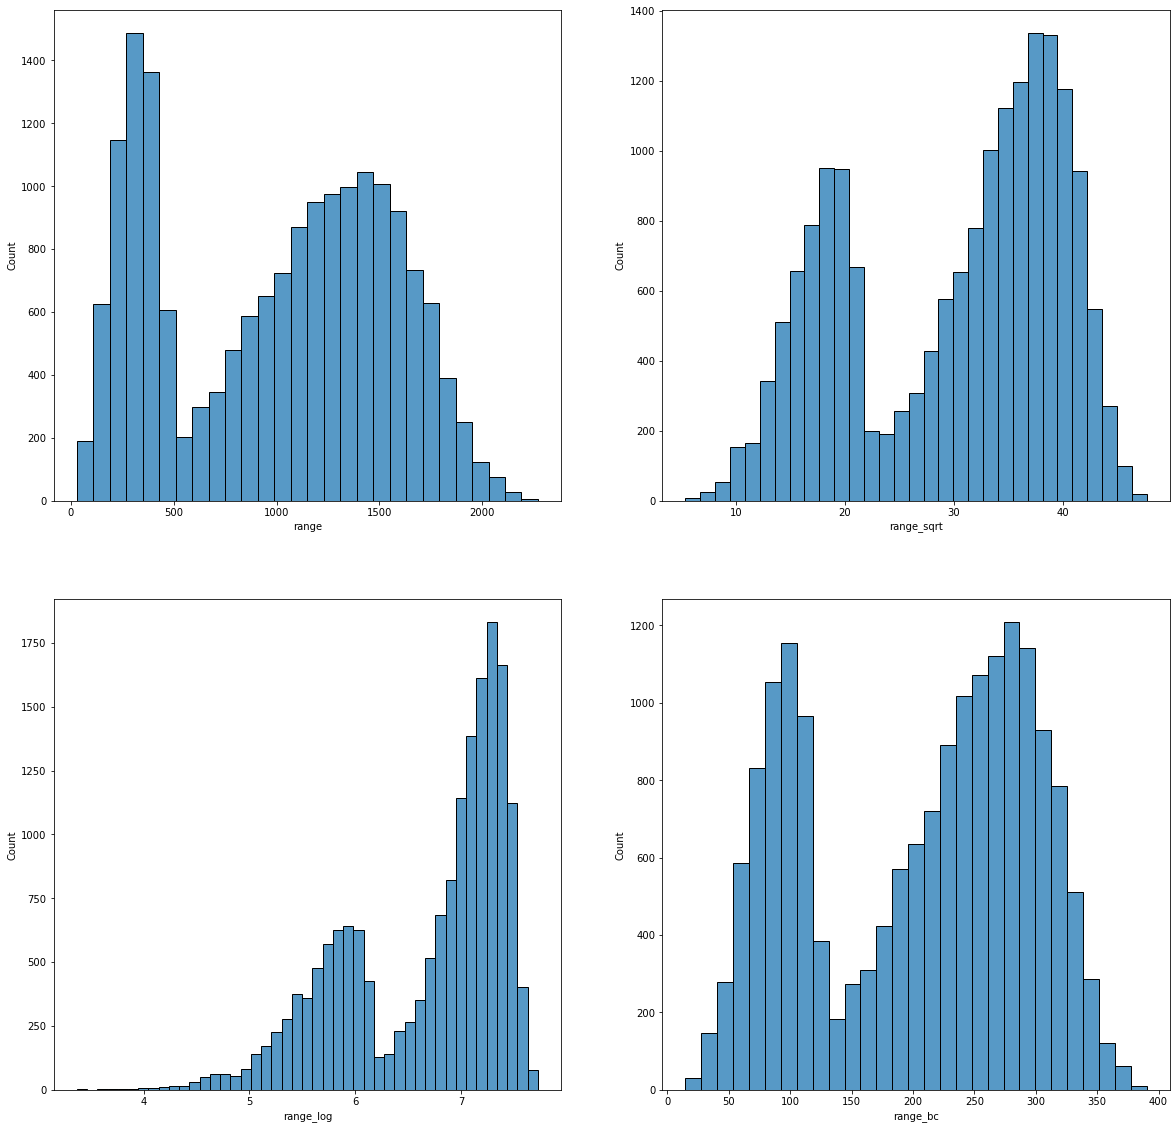

In [936]:
#checking transformations of range


num['range_sqrt'] = num['range']**(1/2)
num["range_log"] = list(map(log_transform_clean, num["range"]))
rng_bc, lmbda = stats.boxcox(num["range"]) 
num["range_bc"] = rng_bc

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,15)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.histplot(num['range'], ax=ax1)
sns.histplot(num['range_sqrt'], ax=ax2)
sns.histplot(num["range_log"], ax=ax3)
sns.histplot(num["range_bc"], ax=ax4)
plt.show()

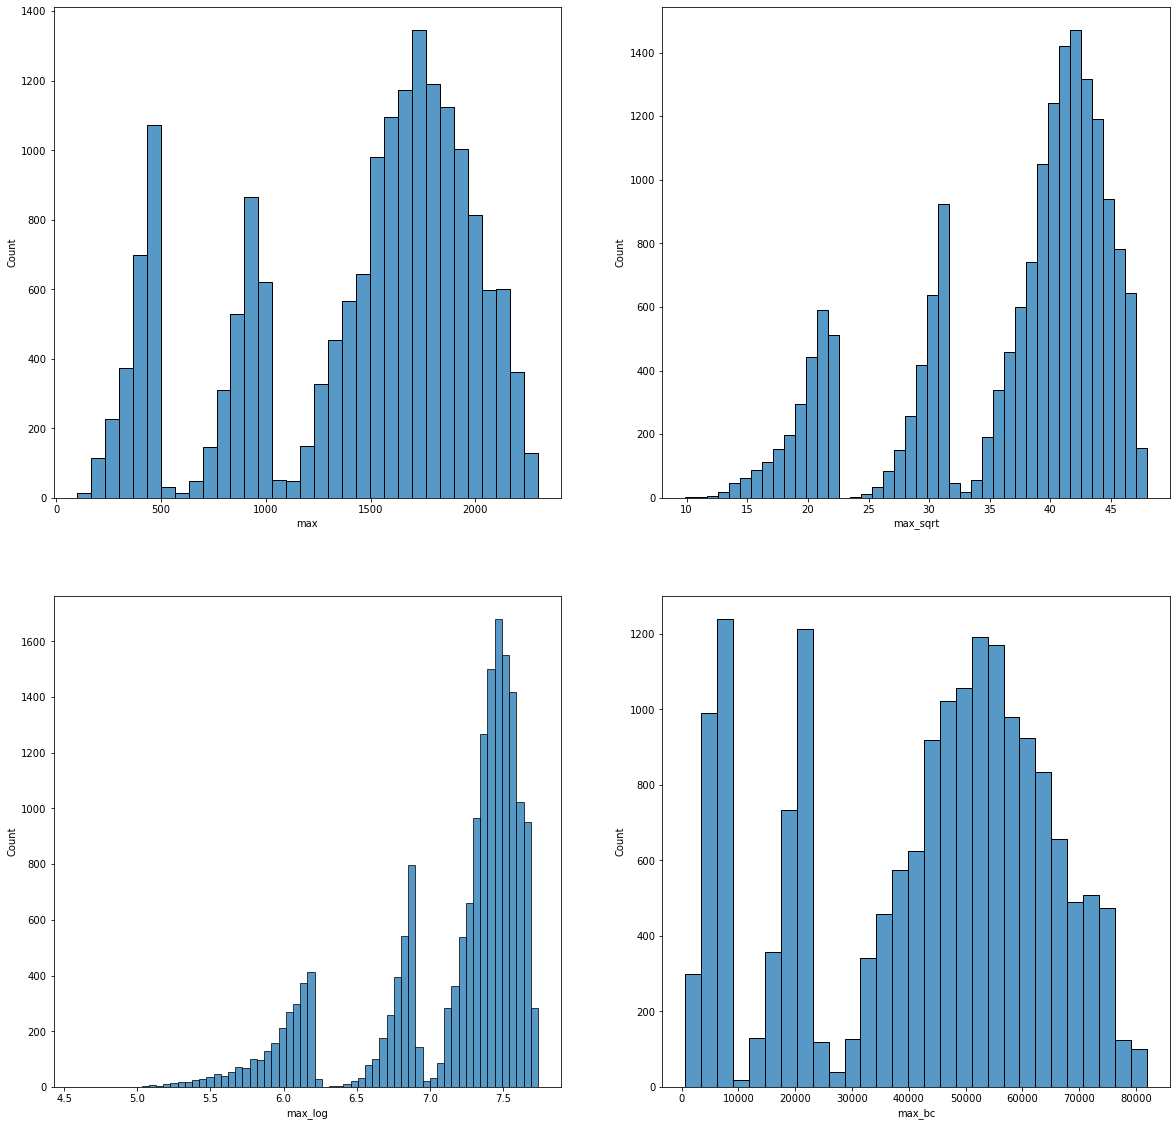

In [937]:
#checking transformations of max

#calculate transformations
num['max_sqrt'] = num['max']**(1/2)
num["max_log"] = list(map(log_transform_clean, num["max"]))
max_bc, lmbda = stats.boxcox(num["max"]) 
num["max_bc"] = max_bc

#plot transformations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,15)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.histplot(num['max'], ax=ax1)
sns.histplot(num['max_sqrt'], ax=ax2)
sns.histplot(num["max_log"], ax=ax3)
sns.histplot(num["max_bc"], ax=ax4)

plt.show()

In [938]:
num.head()

,average_balance,q3_balance,range,max,min,min_sqrt,min_log,q3_sqrt,q3_log,avg_sqrt,avg_log,avg_bc,range_sqrt,range_log,range_bc,max_sqrt,max_log,max_bc
0,1160.75,1095.0,792.0,1669.0,877.0,29.614186,6.776507,33.090784,6.998510,34.069781,7.056822,40766.039813,28.142495,6.674561,179.791934,40.853396,7.419980,50381.652405
1,147.25,78.0,327.0,366.0,39.0,6.244998,3.663562,8.831761,4.356709,12.134661,4.992132,1599.879583,18.083141,5.789960,93.415532,19.131126,5.902633,5055.028925
2,276.50,145.0,222.0,367.0,145.0,12.041595,4.976734,12.041595,4.976734,16.628289,5.622211,4298.105300,14.899664,5.402677,70.010412,19.157244,5.905362,5075.974037
3,1219.00,1119.0,1341.0,1760.0,419.0,20.469489,6.037871,33.451457,7.020191,34.914181,7.105786,44019.351846,36.619667,7.201171,265.036036,41.952354,7.473069,54601.986795
4,1211.00,982.0,1775.0,2140.0,365.0,19.104973,5.899897,31.336879,6.889591,34.799425,7.099202,43567.199019,42.130749,7.481556,325.755988,46.260134,7.668561,73426.753062


In [939]:
#choose which transformations to use
num = num[["min_sqrt", "max_sqrt", "q3_sqrt", "avg_bc","range_bc"]] 


In [940]:
num.shape

(17711, 5)

Categorical Encoding

In [941]:
cat.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes


In [942]:
cat.shape

(17711, 11)

In [943]:
#ordinal encoding
#cat["credit_rating"]=cat["credit_rating"].apply(lambda x : 3 if x == "High" else(2 if x == "Medium" else 1))
#cat["income_level"]=cat["income_level"].apply(lambda x : 3 if x == "High" else(2 if x == "Medium" else 1))
#cat["overdraft_protection"] = cat["overdraft_protection"].apply(lambda x : 1 if x == "Yes" else 0)
#ord_cat = cat.select_dtypes(exclude = object)

In [944]:
#drop some features
cat = cat.drop(["bank_accounts_open", "overdraft_protection", "credit_cards_held", 
                        "homes_owned"], axis = 1)


In [945]:
cat.head()

,offer_accepted,reward,mailer_type,income_level,credit_rating,household_size,own_your_home
0,No,Air Miles,Letter,High,High,4,No
1,No,Air Miles,Letter,Medium,Medium,5,Yes
2,No,Air Miles,Postcard,High,Medium,2,Yes
3,No,Air Miles,Letter,Medium,High,4,No
4,No,Air Miles,Letter,Medium,Medium,6,Yes


Encoding Nominal Categoricals - OneHot Encoder

In [946]:
from sklearn.preprocessing import OneHotEncoder

In [956]:
y = cat["offer_accepted"]
cat = cat.drop(["offer_accepted"], axis = 1)

In [957]:
enc = OneHotEncoder(handle_unknown='error', drop='first')
enc_cat = pd.DataFrame(enc.fit_transform(cat).toarray())


concat with Scaled Numerical

In [958]:
data_enc = pd.DataFrame(np.concatenate([enc_cat,num], axis =1))

In [959]:
data_enc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,29.614186,40.853396,33.090784,40766.039813,179.791934
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,6.244998,19.131126,8.831761,1599.879583,93.415532
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,12.041595,19.157244,12.041595,4298.105300,70.010412
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.469489,41.952354,33.451457,44019.351846,265.036036
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,19.104973,46.260134,31.336879,43567.199019,325.755988


In [960]:
data_enc.shape

(17711, 18)

In [961]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(data_enc)
x_standardized = transformer.transform(data_enc)
print(x_standardized.shape)

(17711, 18)


In [962]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data_enc)
x_normalized = transformer.transform(data_enc)
print(x_normalized.shape)

(17711, 18)


In [964]:
X = x_standardized

Concatenate X with y and export to csv

In [965]:
data_preprocessed = pd.DataFrame(np.concatenate([X,pd.DataFrame(y)],axis=1))

In [966]:
data_preprocessed.to_csv('data_preprocessed.csv', index=False)